In [57]:
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets


In [58]:
#obtener datos
X, Y = load_planar_dataset()

In [59]:
#definienedo capas
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 4 
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)

In [60]:
# INICIALIZANDO PARAMETROS
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    
    w1=np.random.randn(n_h, n_x)*0.01
    b1=np.zeros((n_h,1))
    w2=np.random.randn(n_y, n_h)*0.01
    b2=np.zeros((n_y,1))
    
    assert (w1.shape == (n_h, n_x))
    assert (b1.shape == ((n_h, 1)))
    assert (w2.shape == (n_y, n_h))
    assert (b2.shape == ((n_y, 1)))

    parameters = {"W1": w1,
        "b1": b1,
        "W2": w2,
        "b2": b2
    }
    return parameters

In [61]:
def relu(x):
    x[x<=0]=0
    x[x>0] = 1
    return x

In [62]:
# actividad 4
def forward_propagation(X, parameters):
    
    w1= parameters["W1"]
    b1= parameters["b1"]
    w2= parameters["W2"]
    b2= parameters["b2"]
    
    # Implementando forward progation 
    z1=np.dot(w1,X) + b1
    a1=np.tanh(z1)
    z2=np.dot(w2,a1) + b2
    a2=sigmoid(z2)
    
    assert(a2.shape == (1 , X.shape[1]))
    cache = {"Z1":z1,
             "A1":a1,
             "Z2":z2,
             "A2":a2 }
    
    return a2 , cache 

In [63]:
#implementando funcion costo
def compute_cost(A2, Y, parameters):
    m = Y.shape[1]
    logg = (Y*np.log(A2)) + (1 - Y)*(np.log(1 - A2))
    cost = (-1/m)*(np.sum(logg))
    cost = np.squeeze(cost)
    assert(isinstance(cost, float))
    return cost

In [64]:
#BACKWARD_PROPAGATION
def backward_propagation(parameters, cache, X, Y):
    
    m= X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    #recuperar datos
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    #backWard Progation: calcula dw1 , db1 , dw2 , db2
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2 , A1.T) 
    db2 = (1/m) * np.sum(dZ2 , axis = 1 , keepdims = True)
    dZ1 = np.multiply(np.dot(W2.T,dZ2 ) , (1 -np.power(A1,2)))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims =True)
    
    grads = {
        "dW1":dW1,
        "db1":db1,
        "dW2":dW2,
        "db2":db2
    }
    return grads
    

In [65]:
#ACTIVIDAD 7: Actualización de los parámetros
def update_parameters(parameters, grads, learning_rate = 1.2):
    #Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Retrieve each gradient from the dictionary
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    # Actualizando los parámetros
    W1 = W1 - learning_rate*(dW1)
    b1 = b1 - learning_rate*(db1)
    W2 = W2 - learning_rate*(dW2)
    b2 = b2 - learning_rate*(db2)
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2
                 }
    return parameters

In [151]:
#ACTIVIDAD 8 - Construye tu modelo de red neuronal en nn_model ()
def nn_model(X, Y, n_h, num_iterations = 10000, learning_rate=1.2 , print_cost=False):
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Llamando a la función: Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["W2"]
    costo = []
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        
        # Llamando a la función: Forward propagation
        A2 , cache = forward_propagation(X, parameters)
        
        # Llamando a la función: Cost function.
        cost = compute_cost(A2 , Y , parameters)
        
        # llamando a la funcion : Backprogation
        grads = backward_propagation(parameters, cache , X  , Y)
        
        # llamando a la funcion : actualizar pesos
        parameters = update_parameters(parameters, grads , learning_rate)
        if print_cost and i % 1000 == 0:
            print ("Costo despues de iteracion: ",i," = ", cost)
        if  i % 1000 == 0:
            costo.append(cost)
    return parameters, costo 

In [152]:
d  , cost = nn_model(X , Y , 5 , 10000 , 0.02 , print_cost=True)

Costo despues de iteracion:  0  =  0.6932523197920643
Costo despues de iteracion:  1000  =  0.6829137840879854
Costo despues de iteracion:  2000  =  0.6625701641623941
Costo despues de iteracion:  3000  =  0.626527138484458
Costo despues de iteracion:  4000  =  0.5650925126902682
Costo despues de iteracion:  5000  =  0.4441834533854268
Costo despues de iteracion:  6000  =  0.39255303009286285
Costo despues de iteracion:  7000  =  0.3674522105800947
Costo despues de iteracion:  8000  =  0.3527776056782881
Costo despues de iteracion:  9000  =  0.34305805607647843


In [153]:
#ACTIVIDAD 9
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = np.rint(A2)
    return predictions

Costo despues de iteracion:  0  =  0.6930480201239823
Costo despues de iteracion:  1000  =  0.28808329356901835
Costo despues de iteracion:  2000  =  0.25438549407324496
Costo despues de iteracion:  3000  =  0.233864150389522
Costo despues de iteracion:  4000  =  0.22679248744854008
Costo despues de iteracion:  5000  =  0.22264427549299015
Costo despues de iteracion:  6000  =  0.21973140404281316
Costo despues de iteracion:  7000  =  0.21750365405131294
Costo despues de iteracion:  8000  =  0.21950396469467315
Costo despues de iteracion:  9000  =  0.2185709575018246


Text(0.5, 1.0, 'Límite de decisión para el tamaño de capa oculta 4')

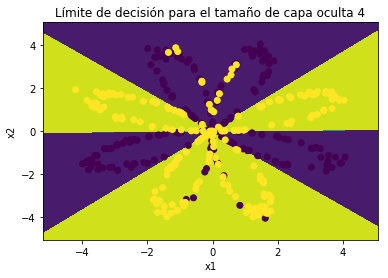

In [154]:
#UTILIZANDO EL MODELO CREADO
parameters , cost = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)
# plotea el limite de decision 
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0]);
plt.title("Límite de decisión para el tamaño de capa oculta " + str(4))

In [155]:
# mostrando precision
predictions = predict(parameters, X)
print ('precision: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-
predictions.T))/float(Y.size)*100) + '%')

precision: 90%


In [183]:
aprendizaje = [0.002 , 0.05 , 0.1 ,  1 , 3 , 10]
modelo = {}
for i in range(0 ,len(aprendizaje)):
    paramm, modelo[int(i)] =  nn_model(X , Y , 5 , 10000 , aprendizaje[int(i)] , print_cost= False)
    

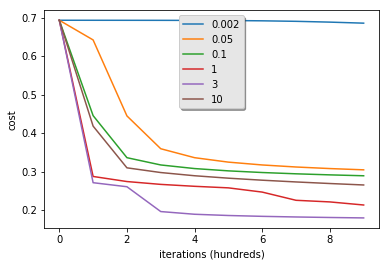

In [184]:
for i in range(0 ,len(aprendizaje)):
    plt.plot( np.squeeze(modelo[int(i)]) , label = str(aprendizaje[int(i)]))
    
plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()
    

In [202]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()
datasets = {"noisy_circles": noisy_circles,
 "noisy_moons": noisy_moons,
 "blobs": blobs,
 "gaussian_quantiles": gaussian_quantiles}


In [208]:
# (Escoje tu dataset)
dataset = "blobs"
X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y =  Y%2


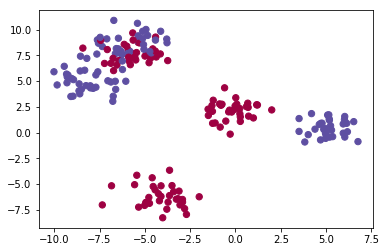

In [209]:
# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral);

precision en dataset noisy_circles: 77%
precision en dataset noisy_moons: 99%
precision en dataset blobs: 83%


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


precision en dataset gaussian_quantiles: 99%


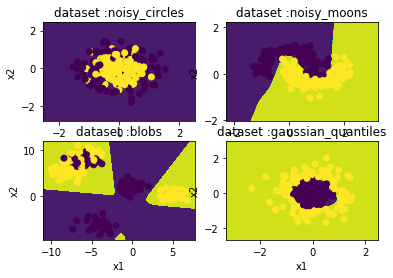

In [229]:
for i , j in zip (datasets ,range(0, len(datasets))):

    X, Y = datasets[i]
    X, Y = X.T, Y.reshape(1, Y.shape[0])
    if dataset == "blobs":
        Y =  Y%2
    parameters , cost = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=False)
    
    predictions = predict(parameters, X)
    print ('precision en dataset ' +  i + ': %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-
    predictions.T))/float(Y.size)*100) + '%')
    
    # plotea el limite de decision 
    plt.subplot(2, 2, j+1)
    plt.title( "dataset :" + i)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0]);
    